In [210]:
#import packages


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon, box
import fiona
import pyproj
import contextily as ctx
import os
import requests
import matplotlib.ticker as ticker
import scipy.stats as stats
import matplotlib.pyplot as plt
from matplotlib import pyplot
from matplotlib.ticker import PercentFormatter
import requests
import matplotlib.colors as colors

#%matplotlib widget
%matplotlib inline

## Things to do

1. Make a map of the tracker locations and the air monitering locations

2. Look at how AQ is influencing biking

## SDOT Bike Counter Data: 


https://data.seattle.gov/browse?category=Transportation&limitTo=datasets&q=&sortBy=relevance&page=1


# Freemont Bike Data
- operating fom 
2012-10-03 00:00:00 to 2022-09-30 23:00:00	

In [211]:
bike= pd.read_csv("Data/Fremont_Bridge_Bicycle_Counter.csv", sep=',')
bike.Date= pd.to_datetime(bike.Date)
bike.head()

#bike.to_csv('Data/bikef.csv')

,Date,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
0,2022-08-01 00:00:00,23.0,7.0,16.0
1,2022-08-01 01:00:00,12.0,5.0,7.0
2,2022-08-01 02:00:00,3.0,0.0,3.0
3,2022-08-01 03:00:00,5.0,2.0,3.0
4,2022-08-01 04:00:00,10.0,2.0,8.0


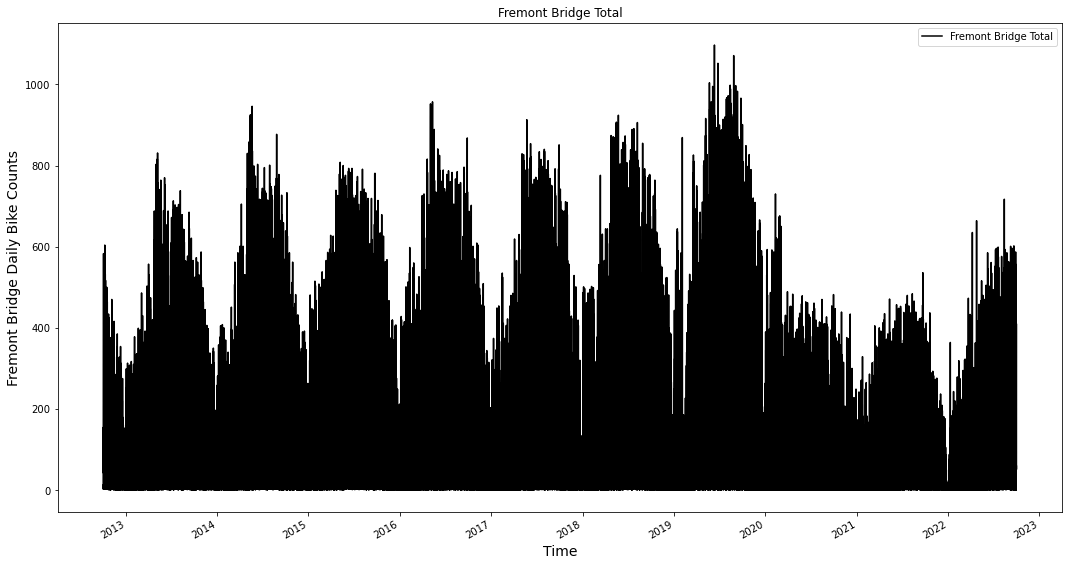

In [212]:
fig,ax = plt.subplots(figsize=(18,10))

ax.set_title('Fremont Bridge Total')

bike.plot(x='Date', y='Fremont Bridge Total',color='k', markerfacecolor='white', ax=ax)

ax.set_xlabel("Time",fontsize=14)

ax.set_ylabel("Fremont Bridge Daily Bike Counts",color='k',fontsize=14);


In [213]:
bike.Date.min()
bike.Date.max()

Timestamp('2022-09-30 23:00:00')

In [214]:
#bike['time_hour'] = bike.Date.dt.hour
#bike

In [215]:
#bike['time_yr'] = bike.Date.dt.year
#bike

# Spokane Street Bridge (West Seattle) 

2014-01-01 00:00:00
2022-09-30 23:00:00

In [216]:
bikess= pd.read_csv("Data/Spokane_St_Bridge_Bicycle_Counter.csv", sep=',')
bikess.Date= pd.to_datetime(bikess.Date)
bikess

#bikess.to_csv('Data/bikess.csv')

,Date,Spokane St. Bridge Total,West,East
0,2020-06-01 00:00:00,2.0,2.0,0.0
1,2020-06-01 01:00:00,1.0,0.0,1.0
2,2020-06-01 02:00:00,2.0,2.0,0.0
3,2020-06-01 03:00:00,1.0,0.0,1.0
4,2020-06-01 04:00:00,3.0,1.0,2.0
...,...,...,...,...
78139,2022-09-30 19:00:00,54.0,7.0,47.0
78140,2022-09-30 20:00:00,27.0,14.0,13.0
78141,2022-09-30 21:00:00,34.0,18.0,16.0
78142,2022-09-30 22:00:00,28.0,6.0,22.0


In [217]:
print(bikess.Date.min())
print(bikess.Date.max())

2014-01-01 00:00:00
2022-09-30 23:00:00


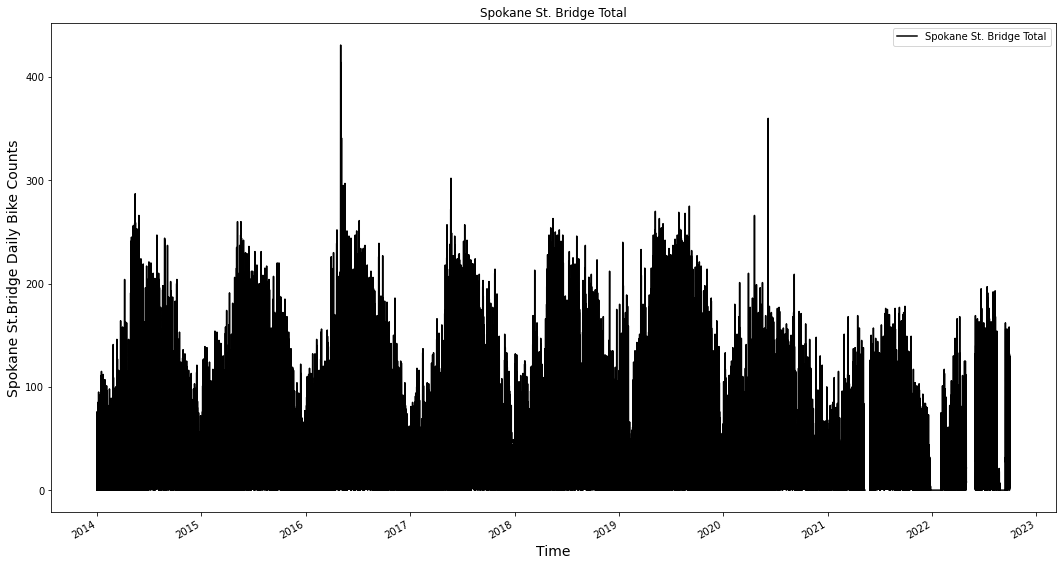

In [218]:
fig,ax = plt.subplots(figsize=(18,10))

ax.set_title('Spokane St. Bridge Total')

bikess.plot(x='Date', y='Spokane St. Bridge Total',color='k', markerfacecolor='white', ax=ax)

ax.set_xlabel("Time",fontsize=14)

ax.set_ylabel("Spokane St.Bridge Daily Bike Counts",color='k',fontsize=14);


In [219]:
#bikess['time_hour'] = bikess.Date.dt.hour
#bikess

#bikess['time_yr'] = bikess.Date.dt.year
#bikess


In [220]:
#result =pd.concat([bike, bikess], keys=["Date", "Date", ])
#result

result =pd.merge(left= bike, right=bikess, on = ['Date'])
result

daily =result.set_index('Date').resample('1D').sum(min_count=24)
daily= daily.reset_index()
daily

monthly =daily.set_index('Date').resample('1M').sum(min_count=27)
monthly= monthly.reset_index()
monthly

yearly =monthly.set_index('Date').resample('1Y').sum(min_count=11)
yearly


result['time_hour'] = result.Date.dt.hour
result['time_yr'] = result.Date.dt.year
result['DOW'] = bikess.Date.dt.dayofweek
result

,Date,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,Spokane St. Bridge Total,West,East,time_hour,time_yr,DOW
0,2022-08-01 00:00:00,23.0,7.0,16.0,4.0,0.0,4.0,0,2022,0
1,2022-08-01 01:00:00,12.0,5.0,7.0,1.0,1.0,0.0,1,2022,0
2,2022-08-01 02:00:00,3.0,0.0,3.0,2.0,0.0,2.0,2,2022,0
3,2022-08-01 03:00:00,5.0,2.0,3.0,2.0,2.0,0.0,3,2022,0
4,2022-08-01 04:00:00,10.0,2.0,8.0,8.0,7.0,1.0,4,2022,0
...,...,...,...,...,...,...,...,...,...,...
75907,2022-09-30 19:00:00,168.0,57.0,111.0,54.0,7.0,47.0,19,2022,2
75908,2022-09-30 20:00:00,73.0,33.0,40.0,27.0,14.0,13.0,20,2022,2
75909,2022-09-30 21:00:00,69.0,30.0,39.0,34.0,18.0,16.0,21,2022,2
75910,2022-09-30 22:00:00,51.0,10.0,41.0,28.0,6.0,22.0,22,2022,2


In [221]:
daily['time_hour'] = daily.Date.dt.hour
daily['time_yr'] = daily.Date.dt.year
daily['DOW'] = daily.Date.dt.dayofweek

daily.head()

,Date,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,Spokane St. Bridge Total,West,East,time_hour,time_yr,DOW
0,2014-01-01,914.0,498.0,416.0,246.0,121.0,125.0,0,2014,2
1,2014-01-02,1865.0,931.0,934.0,496.0,233.0,263.0,0,2014,3
2,2014-01-03,2027.0,1079.0,948.0,510.0,238.0,272.0,0,2014,4
3,2014-01-04,1172.0,657.0,515.0,420.0,190.0,230.0,0,2014,5
4,2014-01-05,1151.0,665.0,486.0,289.0,144.0,145.0,0,2014,6


In [222]:
monthly['time_mn'] = monthly.Date.dt.month
monthly['time_yr'] = monthly.Date.dt.year


monthly.head()

,Date,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,Spokane St. Bridge Total,West,East,time_mn,time_yr
0,2014-01-31,59873.0,30974.0,28899.0,16249.0,7727.0,8522.0,1,2014
1,2014-02-28,47025.0,24086.0,22939.0,12652.0,6071.0,6581.0,2,2014
2,2014-03-31,62352.0,32202.0,30150.0,17396.0,8487.0,8909.0,3,2014
3,2014-04-30,86855.0,44859.0,41996.0,23891.0,11718.0,12173.0,4,2014
4,2014-05-31,118644.0,61462.0,57182.0,35207.0,17085.0,18122.0,5,2014


In [223]:
yearly= yearly.reset_index()

yearly['time_yr'] = yearly.Date.dt.year


yearly

,Date,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,Spokane St. Bridge Total,West,East,time_yr
0,2014-12-31,1005054.0,514678.0,490376.0,282399.0,137284.0,145115.0,2014
1,2015-12-31,981207.0,498117.0,483090.0,298816.0,147291.0,151525.0,2015
2,2016-12-31,982136.0,468134.0,514002.0,297361.0,146093.0,151268.0,2016
3,2017-12-31,962399.0,412095.0,550304.0,275339.0,135474.0,139865.0,2017
4,2018-12-31,1049509.0,424456.0,625053.0,291934.0,143828.0,148106.0,2018
5,2019-12-31,1185678.0,449116.0,736562.0,321298.0,158482.0,162816.0,2019
6,2020-12-31,771299.0,323302.0,447997.0,285186.0,140575.0,144611.0,2020
7,2021-12-31,713191.0,294913.0,418278.0,229960.0,115463.0,114497.0,2021
8,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,2022


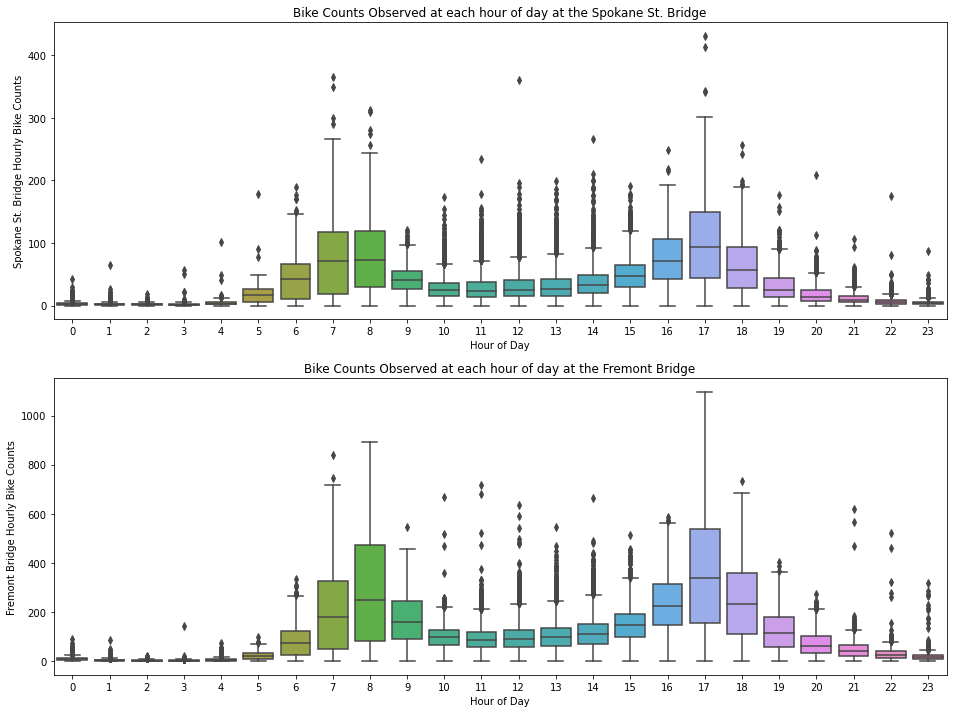

In [224]:
import matplotlib.pyplot as plt
import seaborn


fig, (ax, ax1) = plt.subplots(nrows=2, ncols=1,figsize=(16,12))
seaborn.boxplot(x = result.time_hour, 
                y = result['Spokane St. Bridge Total'],
                ax = ax)


ax.set(ylabel='Spokane St. Bridge Hourly Bike Counts',
       xlabel='Hour of Day',
       title='Bike Counts Observed at each hour of day at the Spokane St. Bridge');



seaborn.boxplot(x = result.time_hour, 
                y = result['Fremont Bridge Total'],
                ax = ax1)


ax1.set(ylabel='Fremont Bridge Hourly Bike Counts',
       xlabel='Hour of Day',
       title='Bike Counts Observed at each hour of day at the Fremont Bridge');
#plt.savefig('box_plot_hour.pdf') 

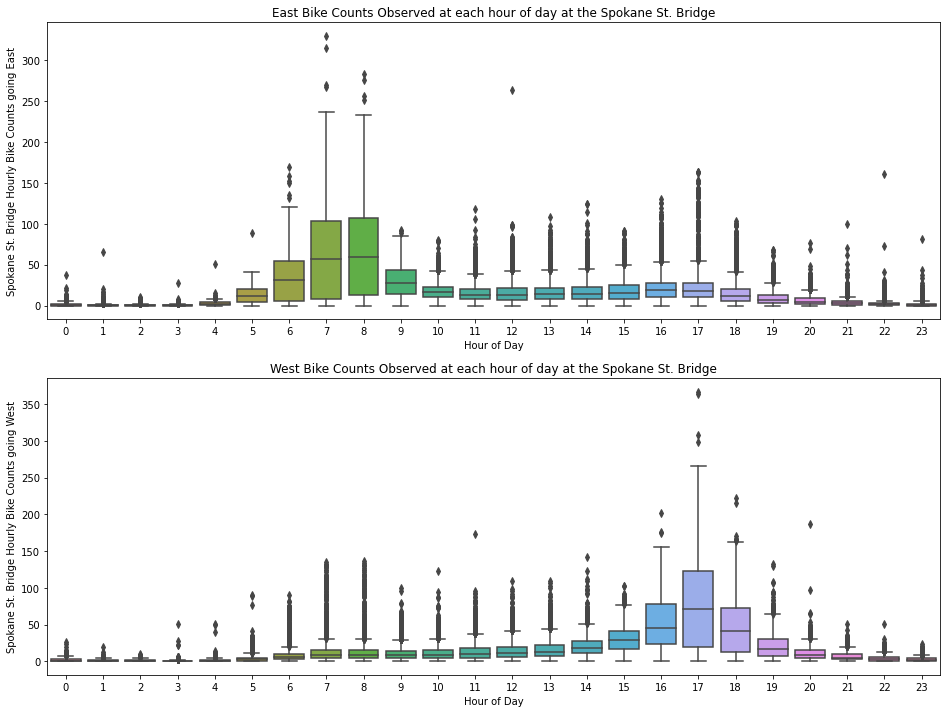

In [225]:
import matplotlib.pyplot as plt
import seaborn


fig, (ax, ax1) = plt.subplots(nrows=2, ncols=1,figsize=(16,12))
seaborn.boxplot(x = result.time_hour, 
                y = result['East'],
                ax = ax)


ax.set(ylabel='Spokane St. Bridge Hourly Bike Counts going East',
       xlabel='Hour of Day',
       title='East Bike Counts Observed at each hour of day at the Spokane St. Bridge');



seaborn.boxplot(x = result.time_hour, 
                y = result['West'],
                ax = ax1)


ax1.set(ylabel='Spokane St. Bridge Hourly Bike Counts going West',
       xlabel='Hour of Day',
       title='West Bike Counts Observed at each hour of day at the Spokane St. Bridge');
#plt.savefig('box_plot_hour.pdf') 

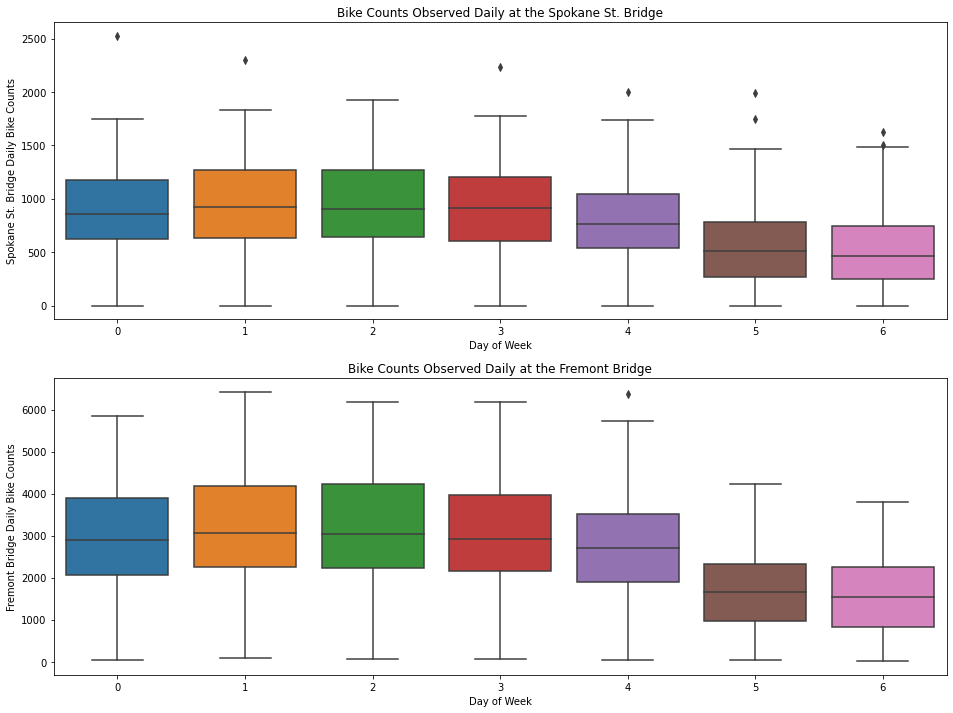

In [226]:
import matplotlib.pyplot as plt
import seaborn


fig, (ax, ax1) = plt.subplots(nrows=2, ncols=1,figsize=(16,12))
seaborn.boxplot(x = daily.DOW, 
                y = daily['Spokane St. Bridge Total'],
                ax = ax)


ax.set(ylabel='Spokane St. Bridge Daily Bike Counts',
       xlabel='Day of Week',
       title='Bike Counts Observed Daily at the Spokane St. Bridge');



seaborn.boxplot(x = daily.DOW, 
                y = daily['Fremont Bridge Total'],
                ax = ax1)


ax1.set(ylabel='Fremont Bridge Daily Bike Counts',
       xlabel='Day of Week',
       title='Bike Counts Observed Daily at the Fremont Bridge');
#plt.savefig('box_plot_hour.pdf') 




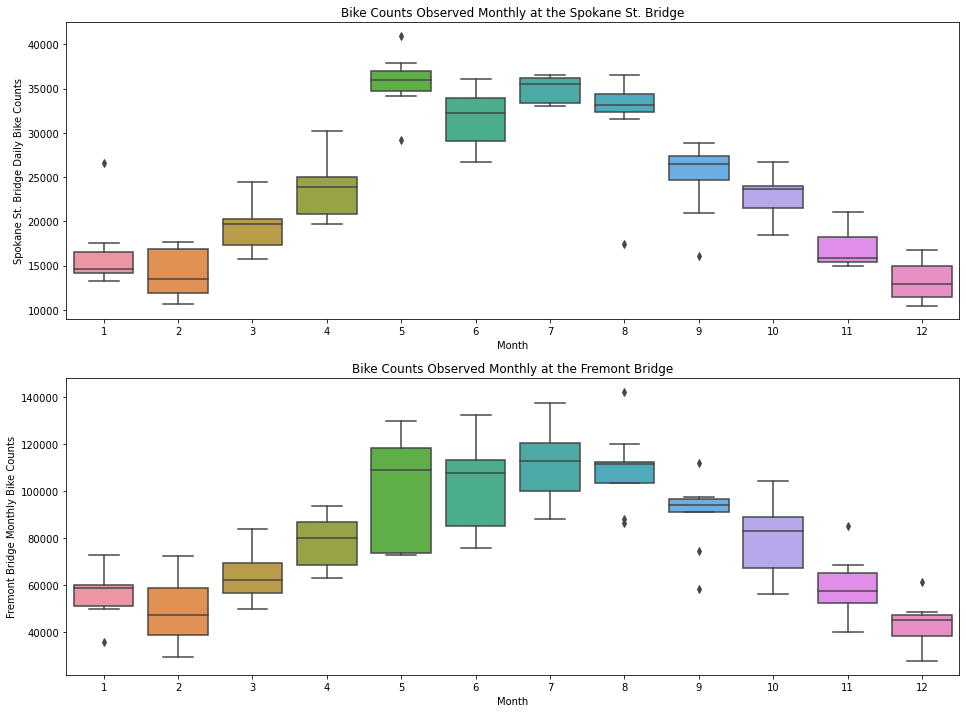

In [227]:
import matplotlib.pyplot as plt
import seaborn


fig, (ax, ax1) = plt.subplots(nrows=2, ncols=1,figsize=(16,12))
seaborn.boxplot(x = monthly.time_mn, 
                y = monthly['Spokane St. Bridge Total'],
                ax = ax)


ax.set(ylabel='Spokane St. Bridge Daily Bike Counts',
       xlabel='Month',
       title='Bike Counts Observed Monthly at the Spokane St. Bridge');



seaborn.boxplot(x = monthly.time_mn, 
                y = monthly['Fremont Bridge Total'],
                ax = ax1)


ax1.set(ylabel='Fremont Bridge Monthly Bike Counts',
       xlabel='Month',
       title='Bike Counts Observed Monthly at the Fremont Bridge');
#plt.savefig('box_plot_hour.pdf') 


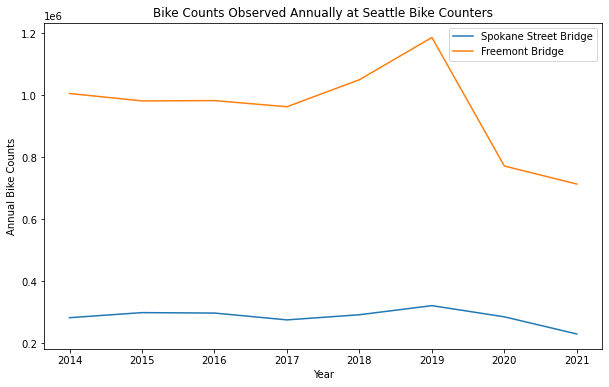

In [229]:
import matplotlib.pyplot as plt
import seaborn


fig, (ax) = plt.subplots(nrows=1, ncols=1,figsize=(10,6))
seaborn.lineplot(x = yearly.time_yr, 
                y = yearly['Spokane St. Bridge Total'],
                ax = ax, label= 'Spokane Street Bridge')



seaborn.lineplot(x = yearly.time_yr, 
                y = yearly['Fremont Bridge Total'],
                ax = ax, label= 'Freemont Bridge')


ax.set(ylabel='Annual Bike Counts',
       xlabel='Year',
       title='Bike Counts Observed Annually at Seattle Bike Counters');
#plt.savefig('box_plot_hour.pdf') 

# Air Quality from Beacon and 10th and Weller Station

aq= pd.read_csv("Data/AW_DataDownload_11_14_22.csv", sep=',')
aq

## Outdoor weather observations recorded at Seattle-Tacoma International Airport: 
https://download.synopticdata.com/#a/KSEA

#out= pd.read_csv("Data/KSEA.csv", sep=',', header=[10])
out= pd.read_csv("Data/KSEA.2022-11-21.csv", sep=',', header=[10])

out.head()

out.describe()

list(out.columns)

out= out.drop(0,axis=0)

out.Date_Time= pd.to_datetime(out.Date_Time)

cols = out.columns.drop(['Date_Time'])

out[cols] = out[cols].apply(pd.to_numeric, errors='coerce')

out.head(5)

percip= out [['Date_Time', 'precip_accum_one_hour_set_1']]
percip.to_csv('Data/percip.csv')

out.info()

fig,ax = plt.subplots(figsize=(18,10))

ax.set_title('Hourly Cumulative Percipitation')

out.plot(x='Date_Time', y='precip_accum_one_hour_set_1',color='k', markerfacecolor='white', ax=ax)

ax.set_xlabel("Time",fontsize=14)

ax.set_ylabel("Hourly Cumulative Percipitation",color='k',fontsize=14);

#UWASH.plot(x='Date_Time', y='relative_humidity_set_1', color='dodgerblue', marker='*', markerfacecolor='white', ax=ax2)

#ax2.set_ylabel("Hourly Relative Humidity (%)",fontsize=14, color='dodgerblue');
#ax2.get_legend().remove()
#ax.get_legend().remove()
#ax2.invert_yaxis()
#ax2.set_ylim(-20,30)

#plt.show();

fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, figsize=(16,17))

x1 = out['Date_Time']
y1 = out['air_temp_set_1']

ax1.plot(x1, y1, label = "Air Temperature", color='c', markerfacecolor='white')



#Axis Labels 
ax1.set_ylabel('Air Temperature (F)')


x2 = out['Date_Time']
y2 = out['relative_humidity_set_1']

ax2.plot(x2, y2, label = "RH", color='m',  markerfacecolor='white')

#Axis Labels 
ax2.set_ylabel('RH ')


x3 = out['Date_Time']
y3 = out['air_temp_low_24_hour_set_1']

ax3.plot(x3, y3, label = "Air Temperature Low (F)", color='dodgerblue', markerfacecolor='white')


#Axis Labels 
ax3.set_ylabel('Wind Speed (m/s)')
#ax3.set_xlabel('Date')
#ax3.set_title('Monthy Degre Day at Pirbadet')
# show a legend on the plot

ax2.legend(loc='lower right')


ax1.legend(loc='lower right')
ax3.legend(loc='lower right')


x4 = out['Date_Time']
y4 = out['precip_accum_one_hour_set_1']

ax4.plot(x4, y4, label = "Hourly Accumulative Percipitation", color='g',  markerfacecolor='white')
#axs.set_xlim(pd.Timestamp('2007-12-01 00:00'), pd.Timestamp('2022-05-01 00:00'))
#ax4.set_xlim(pd.Timestamp('2014-11-01 00:00'), pd.Timestamp('2022-05-01 00:00'))


#Axis Labels 
ax4.set_ylabel('Percipitation (mm)')
ax4.set_xlabel('Date')


# show a legend on the plot

ax4.legend(loc='lower right')

# Display a figure.
plt.show()